In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

import folium
from folium.plugins import HeatMap
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from datetime import timedelta
import holidays
from torch.utils.data import Dataset,DataLoader
import torch
from torch import nn
from tqdm import tqdm
from sklearn.model_selection import train_test_split

In [66]:
#drive.mount('/content/drive')
import pandas as pd

In [67]:
data = pd.read_csv("Fire.csv")

C:\Users\n01538556\AppData\Local\Temp\ipykernel_26484\3191516387.py:1: DtypeWarning: Columns (10,12,13,14,15,16,17,18,19,20,27,28,37,39) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Fire.csv")


In [68]:
df = data.drop(columns=['FPA_ID','FOD_ID','OBJECTID','SOURCE_SYSTEM_TYPE','SOURCE_SYSTEM','NWCG_REPORTING_AGENCY','NWCG_REPORTING_UNIT_ID',
                 'NWCG_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID','LOCAL_INCIDENT_ID','FIRE_NAME','ICS_209_PLUS_INCIDENT_JOIN_ID',
                 'ICS_209_PLUS_COMPLEX_JOIN_ID','MTBS_ID','MTBS_FIRE_NAME','COMPLEX_NAME','COUNTY','FIPS_CODE','FIPS_NAME','SOURCE_REPORTING_UNIT_NAME', 'FIRE_CODE'])

In [69]:
df.head().T

,0,1,2,3,4
X,-121.006,-120.404,-120.736,-119.913,-119.933
Y,40.037,38.933,38.984,38.559,38.559
SOURCE_REPORTING_UNIT,511,503,503,503,503
FIRE_YEAR,2005,2004,2004,2004,2004
DISCOVERY_DATE,2005/02/02 00:00:00+00,2004/05/12 00:00:00+00,2004/05/31 00:00:00+00,2004/06/28 00:00:00+00,2004/06/28 00:00:00+00
DISCOVERY_DOY,33,133,152,180,180
DISCOVERY_TIME,1300.000,845.000,1921.000,1600.000,1600.000
NWCG_CAUSE_CLASSIFICATION,Human,Natural,Human,Natural,Natural
NWCG_GENERAL_CAUSE,Power generation/transmission/distribution,Natural,Debris and open burning,Natural,Natural
NWCG_CAUSE_AGE_CATEGORY,NaN,NaN,NaN,NaN,NaN


In [70]:
nan_count = df.isna().sum()

# Initialize an empty dictionary to hold the results
percentage_nan = {}

# Loop through the Series
for column, count in nan_count.items():
    percentage = (count / df.shape[0]) * 100
    percentage_nan[column] = percentage

# Convert the dictionary to a pandas Series for better readability
percentage_nan_series = pd.Series(percentage_nan)

print(percentage_nan_series)

X                            0.000
Y                            0.000
SOURCE_REPORTING_UNIT        0.000
FIRE_YEAR                    0.000
DISCOVERY_DATE               0.000
DISCOVERY_DOY                0.000
DISCOVERY_TIME              34.255
NWCG_CAUSE_CLASSIFICATION    0.000
NWCG_GENERAL_CAUSE           0.000
NWCG_CAUSE_AGE_CATEGORY     96.721
CONT_DATE                   38.845
CONT_DOY                    38.845
CONT_TIME                   43.015
FIRE_SIZE                    0.000
FIRE_SIZE_CLASS              0.000
LATITUDE                     0.000
LONGITUDE                    0.000
OWNER_DESCR                  0.000
STATE                        0.000
dtype: float64


In [71]:
df.describe(include=['O'])

,SOURCE_REPORTING_UNIT,DISCOVERY_DATE,NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE,NWCG_CAUSE_AGE_CATEGORY,CONT_DATE,FIRE_SIZE_CLASS,OWNER_DESCR,STATE
count,2303566,2303566,2303566,2303566,75527,1408753,2303566,2303566,2303566
unique,6412,10593,3,13,1,10596,7,17,52
top,GAGAS,2008/02/10 00:00:00+00,Human,Missing data/not specified/undetermined,Minor,2011/02/19 00:00:00+00,B,MISSING/NOT SPECIFIED,CA
freq,113791,1220,1782906,597933,75527,865,1104387,1068424,251881


In [72]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X,2303566.000,-96.358,16.644,-178.803,-111.036,-93.470,-82.510,-65.257
Y,2303566.000,36.966,6.008,17.940,33.014,35.722,40.890,70.331
FIRE_YEAR,2303566.000,2006.167,8.044,1992.000,2000.000,2006.000,2013.000,2020.000
DISCOVERY_DOY,2303566.000,165.971,89.753,1.000,91.000,166.000,231.000,366.000
DISCOVERY_TIME,1514471.000,1445.252,425.366,0.000,1234.000,1455.000,1711.000,2359.000
CONT_DOY,1408753.000,170.758,86.264,1.000,99.000,176.000,232.000,366.000
CONT_TIME,1312686.000,1523.731,446.099,0.000,1303.000,1554.000,1810.000,2359.000
FIRE_SIZE,2303566.000,78.161,2630.832,0.000,0.100,0.800,3.000,662700.000
LATITUDE,2303566.000,36.966,6.008,17.940,33.014,35.722,40.890,70.331
LONGITUDE,2303566.000,-96.358,16.644,-178.803,-111.036,-93.470,-82.510,-65.257


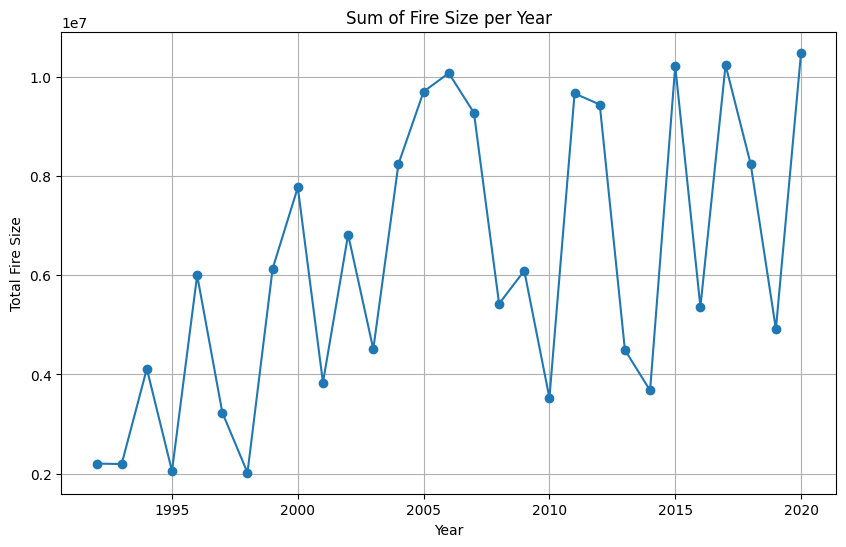

In [73]:
sum_per_year = df.groupby('FIRE_YEAR')['FIRE_SIZE'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(sum_per_year['FIRE_YEAR'], sum_per_year['FIRE_SIZE'], marker='o')
plt.title('Sum of Fire Size per Year')
plt.xlabel('Year')
plt.ylabel('Total Fire Size')
plt.grid(True)
plt.show()

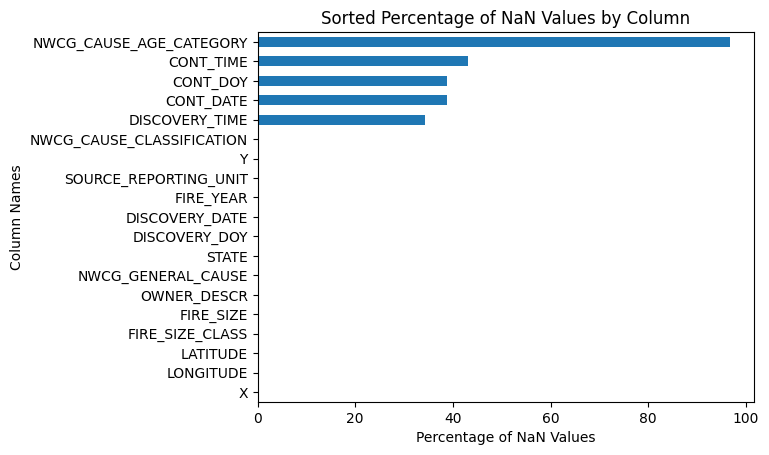

In [74]:
percentage_nan_series = pd.Series(percentage_nan).sort_values()

# Plotting the sorted horizontal bar chart
percentage_nan_series.plot.barh()
plt.xlabel('Percentage of NaN Values')
plt.ylabel('Column Names')
plt.title('Sorted Percentage of NaN Values by Column')
plt.show()

In [75]:
df['NWCG_CAUSE_AGE_CATEGORY'].unique()

array([nan, 'Minor'], dtype=object)

In [76]:
df['NWCG_GENERAL_CAUSE'].unique()

array(['Power generation/transmission/distribution', 'Natural',
       'Debris and open burning',
       'Missing data/not specified/undetermined',
       'Recreation and ceremony', 'Equipment and vehicle use',
       'Arson/incendiarism', 'Fireworks', 'Other causes',
       'Railroad operations and maintenance', 'Smoking',
       'Misuse of fire by a minor', 'Firearms and explosives use'],
      dtype=object)

In [77]:
# Filter rows where "NWCG_CAUSE_AGE_CATEGORY" is 'minor'
filtered_df = df[df['NWCG_CAUSE_AGE_CATEGORY'] == 'Minor']

# Count the occurrences of 'minor' for each unique value in "NWCG_GENERAL_CAUSE"
result_minor = filtered_df['NWCG_GENERAL_CAUSE'].value_counts()



In [78]:
# Filter the DataFrame to exclude 'Minor' in 'NWCG_CAUSE_AGE_CATEGORY'
filtered_df = df[df['NWCG_CAUSE_AGE_CATEGORY'] != 'Minor']

# Create a list of unique values for 'NWCG_GENERAL_CAUSE' you are interested in
unique_values = ['Misuse of fire by a minor', 'Fireworks', 'Arson/incendiarism', 'Smoking', 'Recreation and ceremony',
                 'Debris and open burning','Equipment and vehicle use', 'Firearms and explosives use','Other causes']

# Count the occurrences of 'minor' for each unique value in 'NWCG_GENERAL_CAUSE' using filtered_df
result_non_minor = filtered_df[filtered_df['NWCG_GENERAL_CAUSE'].isin(unique_values)]['NWCG_GENERAL_CAUSE'].value_counts()


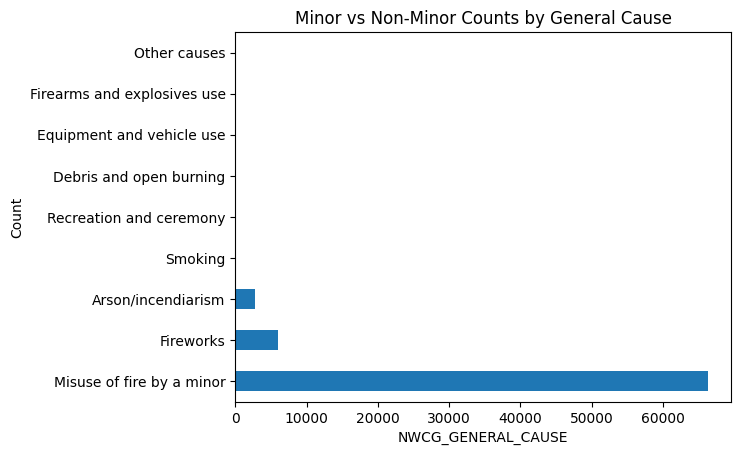

In [79]:
result_minor.plot.barh()
plt.xlabel('NWCG_GENERAL_CAUSE')
plt.ylabel('Count')
plt.title('Minor vs Non-Minor Counts by General Cause')
plt.show()

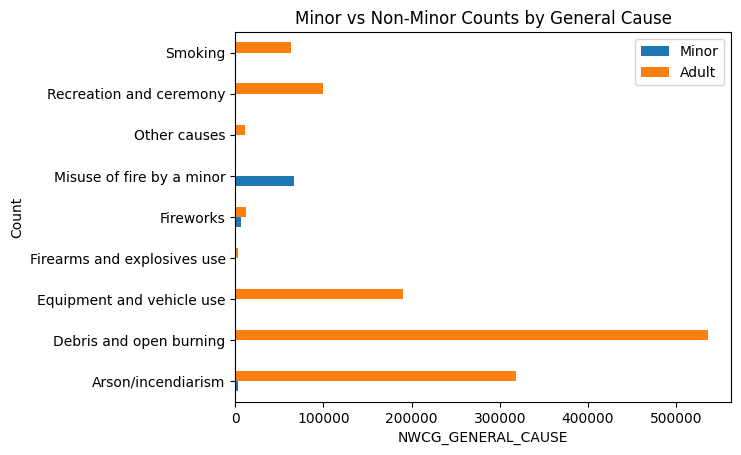

In [80]:


# Combine both Series into a single DataFrame
result_df = pd.DataFrame({'Minor': result_minor, 'Adult': result_non_minor}).fillna(0)

# Plotting
result_df.plot.barh()
plt.xlabel('NWCG_GENERAL_CAUSE')
plt.ylabel('Count')
plt.title('Minor vs Non-Minor Counts by General Cause')
plt.show()

In [81]:
# Create a list of unique values for 'NWCG_GENERAL_CAUSE' you are interested in
unique_values = ['Misuse of fire by a minor', 'Fireworks', 'Arson/incendiarism', 'Smoking', 'Recreation and ceremony',
                 'Debris and open burning','Equipment and vehicle use', 'Firearms and explosives use','Other causes']

# Count the occurrences of 'minor' for each unique value in 'NWCG_GENERAL_CAUSE' using filtered_df

condition = (df['NWCG_GENERAL_CAUSE'].isin(unique_values)) & (df['NWCG_CAUSE_AGE_CATEGORY'] != 'Minor') & (df['NWCG_CAUSE_AGE_CATEGORY'].notna())
df.loc[condition, 'NWCG_CAUSE_AGE_CATEGORY'] = 'Adult'




In [82]:
df.isna().sum()

X                                  0
Y                                  0
SOURCE_REPORTING_UNIT              0
FIRE_YEAR                          0
DISCOVERY_DATE                     0
DISCOVERY_DOY                      0
DISCOVERY_TIME                789095
NWCG_CAUSE_CLASSIFICATION          0
NWCG_GENERAL_CAUSE                 0
NWCG_CAUSE_AGE_CATEGORY      2228039
CONT_DATE                     894813
CONT_DOY                      894813
CONT_TIME                     990880
FIRE_SIZE                          0
FIRE_SIZE_CLASS                    0
LATITUDE                           0
LONGITUDE                          0
OWNER_DESCR                        0
STATE                              0
dtype: int64

In [83]:
disc_time =  disc_time = df[(df['DISCOVERY_TIME'].notnull()) & (df['DISCOVERY_DATE'].notnull()) & (df['CONT_DATE'].notnull()) & (df['CONT_TIME'].notnull())]

In [84]:
def format_time(time_str):
    time_str = time_str.zfill(4)  # Pad with leading zeros
    return time_str[:2] + time_str[2:4]

In [85]:
disc_time['DISCOVERY_TIME'] = disc_time['DISCOVERY_TIME'].astype(str).str.split('.').str[0].apply(format_time)
disc_time['DISCOVERY_DATE'] = disc_time['DISCOVERY_DATE'].str.split(' ').str[0]

disc_time['CONT_TIME'] = disc_time['CONT_TIME'].astype(str).str.split('.').str[0].apply(format_time)
disc_time['CONT_DATE'] = disc_time['CONT_DATE'].str.split(' ').str[0]

C:\Users\n01538556\AppData\Local\Temp\ipykernel_26484\337076197.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disc_time['DISCOVERY_TIME'] = disc_time['DISCOVERY_TIME'].astype(str).str.split('.').str[0].apply(format_time)
C:\Users\n01538556\AppData\Local\Temp\ipykernel_26484\337076197.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disc_time['DISCOVERY_DATE'] = disc_time['DISCOVERY_DATE'].str.split(' ').str[0]
C:\Users\n01538556\AppData\Local\Temp\ipykernel_26484\337076197.py:4: SettingWithCopyWarn

In [86]:
disc_time.head()

,X,Y,SOURCE_REPORTING_UNIT,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE,NWCG_CAUSE_AGE_CATEGORY,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE
0,-121.006,40.037,511,2005,2005/02/02,33,1300,Human,Power generation/transmission/distribution,NaN,2005/02/02,33.000,1730,0.100,A,40.037,-121.006,USFS,CA
1,-120.404,38.933,503,2004,2004/05/12,133,0845,Natural,Natural,NaN,2004/05/12,133.000,1530,0.250,A,38.933,-120.404,USFS,CA
2,-120.736,38.984,503,2004,2004/05/31,152,1921,Human,Debris and open burning,NaN,2004/05/31,152.000,2024,0.100,A,38.984,-120.736,STATE OR PRIVATE,CA
3,-119.913,38.559,503,2004,2004/06/28,180,1600,Natural,Natural,NaN,2004/07/03,185.000,1400,0.100,A,38.559,-119.913,USFS,CA
4,-119.933,38.559,503,2004,2004/06/28,180,1600,Natural,Natural,NaN,2004/07/03,185.000,1200,0.100,A,38.559,-119.933,USFS,CA


In [87]:


# Convert to datetime
disc_time['DISCOVERY_DATETIME'] = pd.to_datetime(disc_time['DISCOVERY_DATE'] + ' ' + disc_time['DISCOVERY_TIME'], format='%Y/%m/%d %H%M')
disc_time['CONT_DATETIME'] = pd.to_datetime(disc_time['CONT_DATE'] + ' ' + disc_time['CONT_TIME'], format='%Y/%m/%d %H%M')



C:\Users\n01538556\AppData\Local\Temp\ipykernel_26484\4251914323.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disc_time['DISCOVERY_DATETIME'] = pd.to_datetime(disc_time['DISCOVERY_DATE'] + ' ' + disc_time['DISCOVERY_TIME'], format='%Y/%m/%d %H%M')
C:\Users\n01538556\AppData\Local\Temp\ipykernel_26484\4251914323.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disc_time['CONT_DATETIME'] = pd.to_datetime(disc_time['CONT_DATE'] + ' ' + disc_time['CONT_TIME'], format='%Y/%m/%d %H%M')


In [88]:
disc_time['Fire_out_time'] = (disc_time['CONT_DATETIME'] - disc_time['DISCOVERY_DATETIME']).dt.total_seconds() / 3600.0

C:\Users\n01538556\AppData\Local\Temp\ipykernel_26484\637187882.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disc_time['Fire_out_time'] = (disc_time['CONT_DATETIME'] - disc_time['DISCOVERY_DATETIME']).dt.total_seconds() / 3600.0


In [89]:
disc_time.head()

,X,Y,SOURCE_REPORTING_UNIT,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE,NWCG_CAUSE_AGE_CATEGORY,...,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,DISCOVERY_DATETIME,CONT_DATETIME,Fire_out_time
0,-121.006,40.037,511,2005,2005/02/02,33,1300,Human,Power generation/transmission/distribution,NaN,...,1730,0.100,A,40.037,-121.006,USFS,CA,2005-02-02 13:00:00,2005-02-02 17:30:00,4.500
1,-120.404,38.933,503,2004,2004/05/12,133,0845,Natural,Natural,NaN,...,1530,0.250,A,38.933,-120.404,USFS,CA,2004-05-12 08:45:00,2004-05-12 15:30:00,6.750
2,-120.736,38.984,503,2004,2004/05/31,152,1921,Human,Debris and open burning,NaN,...,2024,0.100,A,38.984,-120.736,STATE OR PRIVATE,CA,2004-05-31 19:21:00,2004-05-31 20:24:00,1.050
3,-119.913,38.559,503,2004,2004/06/28,180,1600,Natural,Natural,NaN,...,1400,0.100,A,38.559,-119.913,USFS,CA,2004-06-28 16:00:00,2004-07-03 14:00:00,118.000
4,-119.933,38.559,503,2004,2004/06/28,180,1600,Natural,Natural,NaN,...,1200,0.100,A,38.559,-119.933,USFS,CA,2004-06-28 16:00:00,2004-07-03 12:00:00,116.000


C:\Users\n01538556\AppData\Local\Temp\ipykernel_26484\3498891598.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disc_time['Fire_out_time_rounded'] = disc_time['Fire_out_time'].round()


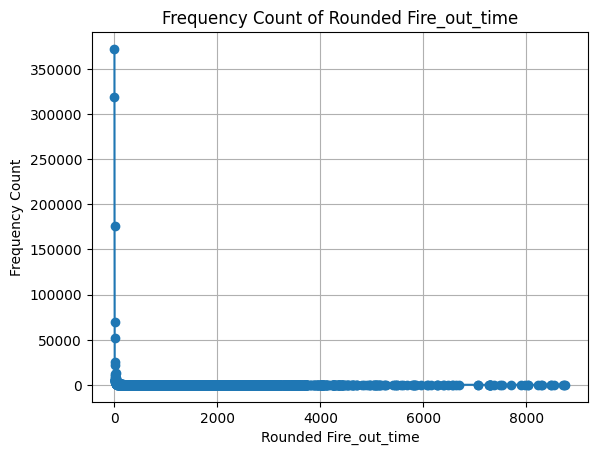

In [90]:
disc_time['Fire_out_time_rounded'] = disc_time['Fire_out_time'].round()
frequency_count = disc_time['Fire_out_time_rounded'].value_counts().sort_index()
plt.plot(frequency_count.index, frequency_count.values, marker='o')
plt.xlabel('Rounded Fire_out_time')
plt.ylabel('Frequency Count')
plt.title('Frequency Count of Rounded Fire_out_time')
plt.grid(True)
plt.show()

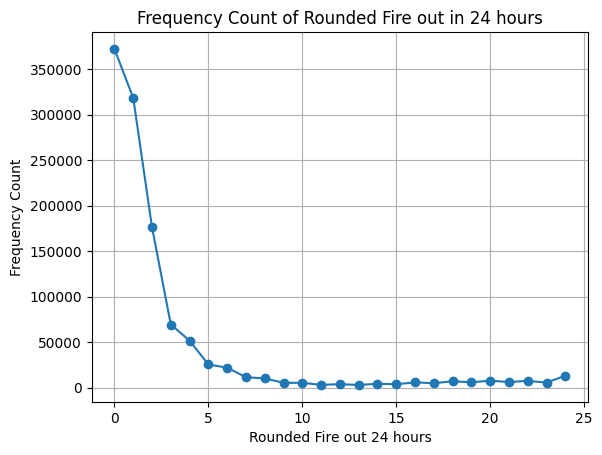

In [91]:
frequency_count = disc_time[disc_time['Fire_out_time_rounded'] <= 24]['Fire_out_time_rounded'].value_counts().sort_index()
plt.plot(frequency_count.index, frequency_count.values, marker='o')
plt.xlabel('Rounded Fire out 24 hours')
plt.ylabel('Frequency Count')
plt.title('Frequency Count of Rounded Fire out in 24 hours')
plt.grid(True)
plt.show()

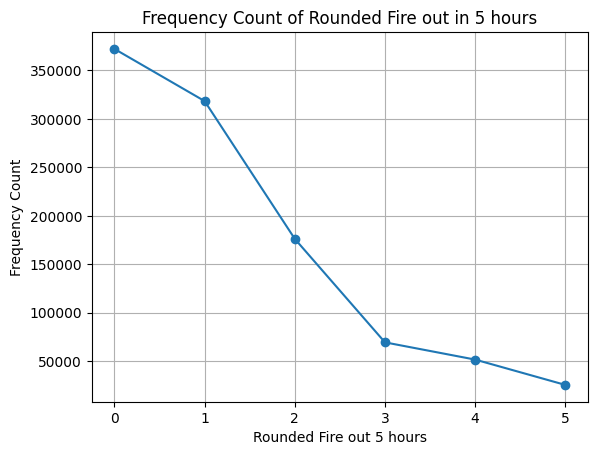

In [92]:
frequency_count = disc_time[disc_time['Fire_out_time_rounded'] <= 5]['Fire_out_time_rounded'].value_counts().sort_index()
plt.plot(frequency_count.index, frequency_count.values, marker='o')
plt.xlabel('Rounded Fire out 5 hours')
plt.ylabel('Frequency Count')
plt.title('Frequency Count of Rounded Fire out in 5 hours')
plt.grid(True)
plt.show()

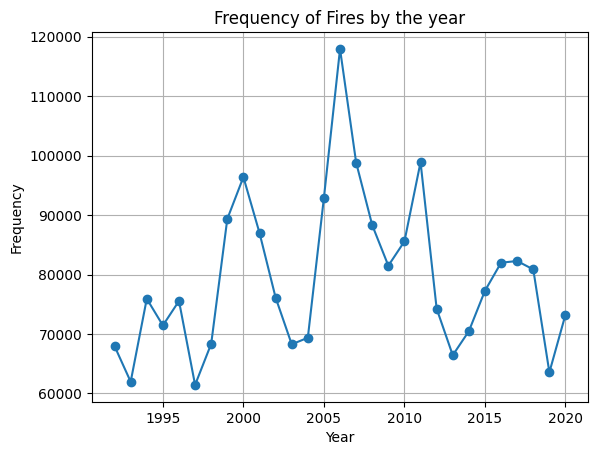

In [93]:
frequency_count = df['FIRE_YEAR'].value_counts()
sorted_frequency_count = frequency_count.sort_index()

plt.plot(sorted_frequency_count.index, sorted_frequency_count.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Frequency of Fires by the year')
plt.grid(True)
plt.show()


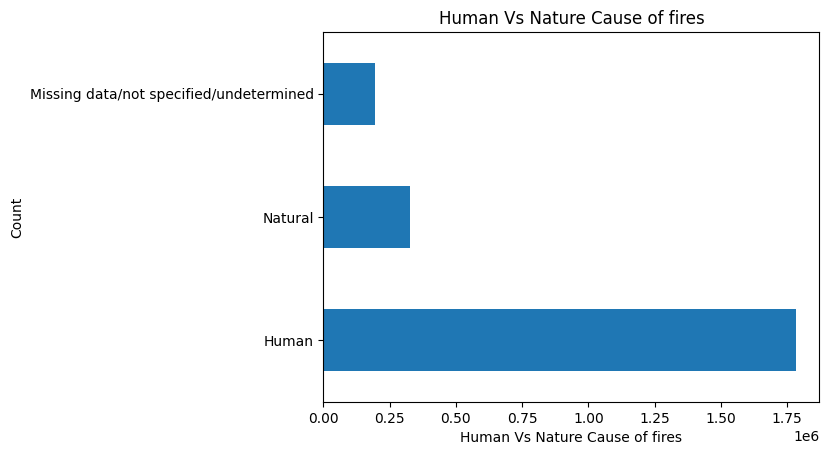

In [94]:
frequency_count = df['NWCG_CAUSE_CLASSIFICATION'].value_counts()

frequency_count.plot.barh()
plt.xlabel('Human Vs Nature Cause of fires')
plt.ylabel('Count')
plt.title('Human Vs Nature Cause of fires')
plt.show()

In [95]:
us_holidays = holidays.UnitedStates()

In [96]:
# # Function to check if a date is a holiday and not a weekend
# def is_vacation_day(date):
#     return date in us_holidays and date.weekday() < 5

In [97]:
# Function to check if a date is a holiday and not a weekend
def is_vacation_day(date):
    # Check the date and 2 days before/after it
    for delta in range(-2, 3):  # Creates a range from -2 to 2
        check_date = date + timedelta(days=delta)
        if check_date in us_holidays:
            return True
    return False

In [98]:
# Apply the function to create a new column
disc_time['DISCOVERY_DATE'] = pd.to_datetime(disc_time['DISCOVERY_DATE'])
disc_time['national_vacation'] = disc_time['DISCOVERY_DATE'].apply(is_vacation_day)

C:\Users\n01538556\AppData\Local\Temp\ipykernel_26484\2471828474.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disc_time['DISCOVERY_DATE'] = pd.to_datetime(disc_time['DISCOVERY_DATE'])
C:\Users\n01538556\AppData\Local\Temp\ipykernel_26484\2471828474.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disc_time['national_vacation'] = disc_time['DISCOVERY_DATE'].apply(is_vacation_day)


In [99]:
disc_time['weekend'] = disc_time['DISCOVERY_DATE'].dt.dayofweek > 4

C:\Users\n01538556\AppData\Local\Temp\ipykernel_26484\748374928.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disc_time['weekend'] = disc_time['DISCOVERY_DATE'].dt.dayofweek > 4


In [100]:
disc_time.head(1).T

,0
X,-121.006
Y,40.037
SOURCE_REPORTING_UNIT,511
FIRE_YEAR,2005
DISCOVERY_DATE,2005-02-02 00:00:00
DISCOVERY_DOY,33
DISCOVERY_TIME,1300
NWCG_CAUSE_CLASSIFICATION,Human
NWCG_GENERAL_CAUSE,Power generation/transmission/distribution
NWCG_CAUSE_AGE_CATEGORY,NaN


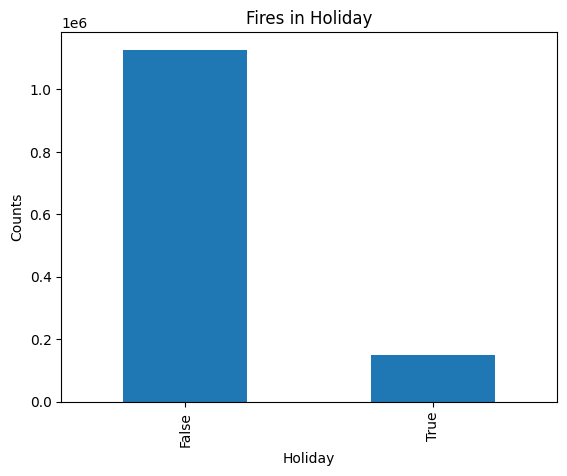

In [101]:
vacation_counts = disc_time['national_vacation'].value_counts()

# Plot the counts as a bar diagram
vacation_counts.plot(kind='bar')

# Set the title and labels
plt.title('Fires in Holiday')
plt.xlabel('Holiday')
plt.ylabel('Counts')

# Show the plot
plt.show()

In [102]:
print(vacation_counts)

national_vacation
False    1126932
True      149862
Name: count, dtype: int64


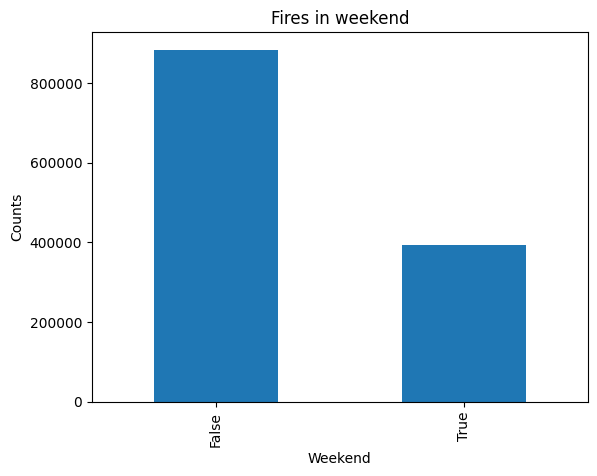

In [103]:
vacation_counts = disc_time['weekend'].value_counts()

# Plot the counts as a bar diagram
vacation_counts.plot(kind='bar')

# Set the title and labels
plt.title('Fires in weekend')
plt.xlabel('Weekend')
plt.ylabel('Counts')

# Show the plot
plt.show()

In [104]:
disc_time['weekend'].value_counts()

weekend
False    883104
True     393690
Name: count, dtype: int64

In [105]:
# Get US holidays for a specific year
us_holidays = holidays.UnitedStates(years=2023)

# Count the number of holidays in that year
number_of_holidays = len(us_holidays)

print(f"There are {number_of_holidays} public holidays in the United States in the year 2023.")

There are 13 public holidays in the United States in the year 2023.


In [106]:
disc_time1 = disc_time[(disc_time['FIRE_SIZE_CLASS'] != 'A') & (disc_time['FIRE_SIZE_CLASS'] != 'B')]

In [107]:
grouped_df = disc_time1.groupby('Fire_out_time_rounded')['FIRE_SIZE'].agg(['mean', 'median']).reset_index()
grouped = grouped_df[grouped_df['Fire_out_time_rounded'] <= 50]

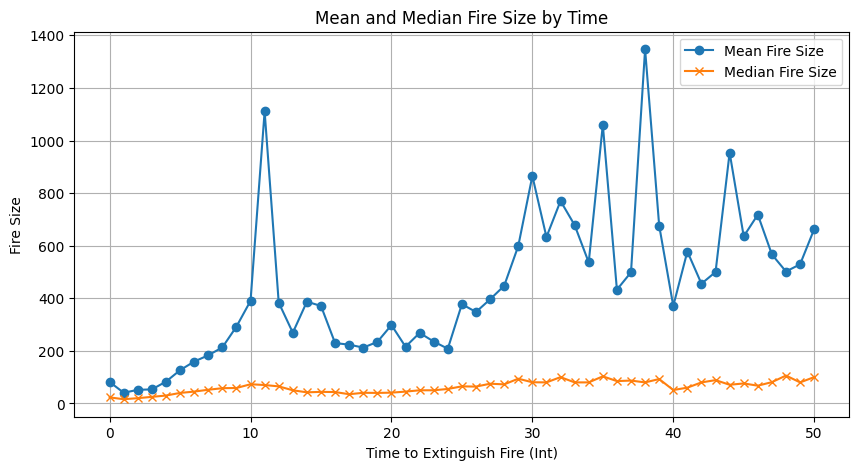

In [108]:
plt.figure(figsize=(10, 5))

# Plot mean fire size
plt.plot(grouped['Fire_out_time_rounded'], grouped['mean'], label='Mean Fire Size', marker='o')

# Plot median fire size
plt.plot(grouped['Fire_out_time_rounded'], grouped['median'], label='Median Fire Size', marker='x')

# Adding title and labels
plt.title('Mean and Median Fire Size by Time')
plt.xlabel('Time to Extinguish Fire (Int)')
plt.ylabel('Fire Size')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

In [110]:
disc_time2 = disc_time[disc_time['FIRE_SIZE_CLASS'] == 'G']

In [111]:
# Create a map instance
m = folium.Map(location=[disc_time2['LATITUDE'].mean(), disc_time2['LONGITUDE'].mean()], zoom_start=6)

# Create a list of lat and lon pairs
heat_data = [[row['LATITUDE'], row['LONGITUDE']] for index, row in disc_time2.iterrows()]

# Create a HeatMap layer and add it to the map
HeatMap(heat_data).add_to(m)

# Save it to an HTML file
m.save('heatmap.html')

In [112]:
m

In [113]:
disc_time1.head().T
df = disc_time1.drop(columns=['X','Y','SOURCE_REPORTING_UNIT','DISCOVERY_DATE','NWCG_GENERAL_CAUSE','NWCG_CAUSE_AGE_CATEGORY','CONT_DATE','CONT_DOY','CONT_TIME','FIRE_SIZE_CLASS','OWNER_DESCR','DISCOVERY_DATETIME','CONT_DATETIME','Fire_out_time','Fire_out_time_rounded'])

In [114]:
df.head().T

,16,17,25,37,39
FIRE_YEAR,2004,2004,2004,2005,2005
DISCOVERY_DOY,280,287,202,27,43
DISCOVERY_TIME,1415,1618,1405,2200,1520
NWCG_CAUSE_CLASSIFICATION,Human,Human,Natural,Human,Human
FIRE_SIZE,16823.000,7700.000,10.000,50.300,125.000
LATITUDE,38.523,38.780,33.316,35.000,36.002
LONGITUDE,-120.212,-120.260,-105.512,-83.351,-81.590
STATE,CA,CA,NM,NC,NC
national_vacation,False,True,False,False,False
weekend,False,False,False,False,True


In [115]:
label_encoder = LabelEncoder()
# df['NWCG_CAUSE_CLASSIFICATION'] = label_encoder.fit_transform(df['NWCG_CAUSE_CLASSIFICATION'])
# df['STATE'] = label_encoder.fit_transform(df['STATE'])
df = pd.get_dummies(df, columns=['NWCG_CAUSE_CLASSIFICATION'])

df['national_vacation'] = label_encoder.fit_transform(df['national_vacation'])
df['weekend'] = label_encoder.fit_transform(df['weekend'])
df['DISCOVERY_TIME'] = df['DISCOVERY_TIME'].astype(int)

In [116]:
import math

def haversine_distance(lat1, lon1, lat2, lon2):
    """
    Calculate the Haversine distance between two points on the Earth specified in decimal degrees.

    :param lat1: Latitude of the first point
    :param lon1: Longitude of the first point
    :param lat2: Latitude of the second point
    :param lon2: Longitude of the second point
    :return: Distance in meters
    """
    # Radius of the Earth in meters
    earth_radius = 6371000  # meters

    # Convert latitude and longitude from degrees to radians
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)

    # Haversine formula
    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad
    a = math.sin(dlat / 2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    # Calculate the distance
    distance = earth_radius * c

    return distance

In [117]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the Dense Neural Network model
class DenseNN(nn.Module):
    def __init__(self, input_dim):
        super(DenseNN, self).__init__()

        # Fully connected layer 1: 2914 -> 1024
        self.fc1 = nn.Linear(input_dim, 1024)

        # Fully connected layer 2: 1024 -> 512
        self.fc2 = nn.Linear(1024, 512)

        # Fully connected layer 3: 512 -> 256
        self.fc3 = nn.Linear(512, 256)

        # Output layer: 256 -> 2 (lat and long)
        self.fc4 = nn.Linear(256, 2)  # Two output units for lat and long


    def forward(self, x):
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = nn.functional.relu(self.fc3(x))
        x = self.fc4(x)
        return x


In [118]:
from torch.utils.data import Dataset,DataLoader

class Dataload(Dataset):
    def __init__(self, df):

        self.df = df


    def __len__(self):
        return len(self.df)

    def __getitem__(self, index):

        # Get the unique identifier 'idx' for the row
        row = self.df.iloc[index]
        label = [row.LATITUDE, row.LONGITUDE]
        #row = row.drop(columns = ['LATITUDE','LONGITUDE'])
        row_without_lat_long = row.drop(['LATITUDE', 'LONGITUDE'])
        data = torch.tensor(row_without_lat_long, dtype=torch.float32)
        label_tensor = torch.tensor(label, dtype=torch.float32)
        return data, label_tensor

In [127]:
import warnings
def NN_model_run(df, state):
    warnings.simplefilter(action='ignore', category=FutureWarning)
    

    learning_rate = 0.001
    batch_size = 32
    epochs = 100
    BATCH_SIZE = 32

    df = df[df['STATE'] == state]
    df = df.drop('STATE', axis=1)


    train_dataset = Dataload(df[~df['FIRE_YEAR'].isin([2019, 2020])].drop('FIRE_YEAR', axis=1))
    train_loader = DataLoader(train_dataset, batch_size = BATCH_SIZE, shuffle=True)

    val_dataset = Dataload(df[df['FIRE_YEAR'].isin([2019, 2020])].drop('FIRE_YEAR', axis=1))
    val_loader = DataLoader(val_dataset, batch_size = BATCH_SIZE, shuffle=False)


    DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
    # Create the DenseNN model
    model = DenseNN(8).to(DEVICE)

    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)





    # @title Default title text
    criterion = nn.MSELoss()
    train_score = []
    val_score = []
    distance_meter = []

    for epoch in range(epochs):
        if (epoch > 5):
            break
        model.train()
        loop = tqdm(train_loader)
        running_loss = 0.0

        pbar = tqdm(enumerate(train_loader), total=len(train_loader), desc='Train ')

        for i, (inputs, labels) in pbar:


            inputs = inputs.to(DEVICE, dtype=torch.float)
            labels = labels.to(DEVICE, dtype=torch.float)

            # Backward and optimize
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            outputs = outputs.float()

            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()






        # Print loss for this epochp
        loss = running_loss / len(train_loader)
        





        train_score.append([loss])


        model.eval()
        loop = tqdm(val_loader)
        running_loss = 0.0
        total_distance_meters = 0.0

        pbar = tqdm(enumerate(val_loader), total=len(val_loader), desc='Valid ')
        for i, (inputs, labels) in pbar:

            with torch.no_grad():

                inputs = inputs.to(DEVICE, dtype=torch.float)
                labels = labels.to(DEVICE, dtype=torch.float)



                # Forward pass
                outputs = model(inputs)
                outputs = outputs.float()
                loss = criterion(outputs, labels)
                running_loss += loss.item()
                # Calculate the distance in meters between predicted and actual positions
                predicted_positions = outputs.cpu().numpy()
                actual_positions = labels.cpu().numpy()

                for predicted, actual in zip(predicted_positions, actual_positions):
                    lat1, lon1 = actual[0], actual[1]
                    lat2, lon2 = predicted[0], predicted[1]

                    # Calculate the distance in meters and add it to the total
                    distance_meters = haversine_distance(lat1, lon1, lat2, lon2)
                    total_distance_meters += distance_meters




        # Print loss for this epochp
        loss = running_loss / len(val_loader)
        

        average_distance_meters = total_distance_meters / len(val_loader)


        val_score.append([loss])
        distance_meter.append([average_distance_meters])



    return train_score,val_score,distance_meter


In [120]:
df1 = df.copy()
import matplotlib.pyplot as plt
import pandas as pd
from ast import literal_eval

In [ ]:
df = df1.copy()
for state in df['STATE'].unique():
    print(state)
    train_score, val_score, distance_meter = NN_model_run(df,state)




    # Specify the file path
    file_path = 'meter_Scores.txt'

    # Open the file in append mode and write the list elements to it
    with open(file_path, 'a') as file:
        for distance in distance_meter:
            file.write(str(distance) + '\n')

    # Close the file
    file.close()
    # Plot Training and Validation Loss starting from the 3rd value
    plt.plot(train_score, label='Train Loss', color='b')  # Start from 3rd value
    plt.plot(val_score, label='Valid Loss', color='g')  # Start from 3rd value
    plt.title(f'{state} Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig(f'{state}.png')

